# Investigating Change in Netflix Movie Durations

In this project, I'll investigate changes in the duration of Netflix movies over the years, in order to find out if movie lengths are getting shorter.

The inspiration and dataset for this project is from this [DataCamp project](https://projects.datacamp.com/projects/1674).

## Load, inspect and prepare data

In [59]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('netflix_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
duration        7787 non-null int64
description     7787 non-null object
genre           7787 non-null object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


It's clear from the **type** column that there are other programme types besides movies. Let's subset the dataframe to keep only movies.

In [61]:
df = df[df['type'] == 'Movie']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
show_id         5377 non-null object
type            5377 non-null object
title           5377 non-null object
director        5214 non-null object
cast            4951 non-null object
country         5147 non-null object
date_added      5377 non-null object
release_year    5377 non-null int64
duration        5377 non-null int64
description     5377 non-null object
genre           5377 non-null object
dtypes: int64(2), object(9)
memory usage: 504.1+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


Some of the columns are of no use to the analysis. Let's keep only the **title**, **country**, **release_year**, **duration**, and **genre** columns.

Let's also change **release_year** to a datetime object, since we may be needing it for some time-based exploration/analysis later, and set the index to **release_year**.

In [62]:
# Subset columns
columns = ['title', 'country', 'release_year', 'duration', 'genre']
df = df[columns]

# Change `release_year` column to a datetime object and set index to `release_year`
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df = df.set_index('release_year').sort_index()

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5377 entries, 1942-01-01 to 2021-01-01
Data columns (total 4 columns):
title       5377 non-null object
country     5147 non-null object
duration    5377 non-null int64
genre       5377 non-null object
dtypes: int64(1), object(3)
memory usage: 210.0+ KB
None


,title,country,duration,genre
release_year,,,,
1942-01-01,Prelude to War,United States,52,Classic Movies
1942-01-01,The Battle of Midway,United States,18,Classic Movies
1943-01-01,Why We Fight: The Battle of Russia,United States,82,Documentaries
1943-01-01,Undercover: How to Operate Behind Enemy Lines,United States,61,Classic Movies
1943-01-01,WWII: Report from the Aleutians,United States,45,Documentaries


## Visualize data

Let's use a line plot and a scatter plot to visualize the relationship between the movie release year and duration.

For the scatter plot, each data point will be highlighted according to the movie genre, where the more popular genres will have their own colors and the less popular genres will all share the same color.

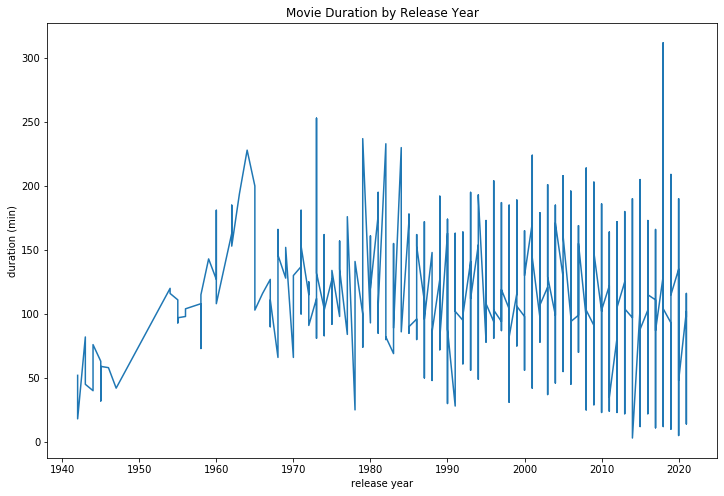

In [63]:
# Line plot
fig = plt.figure(figsize=(12, 8))  # Use a bigger canvas for the plot

plt.plot(df['duration'])
plt.xlabel('release year')
plt.ylabel('duration (min)')
plt.title('Movie Duration by Release Year')
plt.show();

In [64]:
# Inspect how popular the genres are
df['genre'].value_counts(normalize=True)

Dramas                  0.257393
Comedies                0.199740
Documentaries           0.139669
Action                  0.134090
Children                0.093361
Stand-Up                0.059699
Horror Movies           0.045378
International Movies    0.021201
Classic Movies          0.014320
Uncategorized           0.010415
Thrillers               0.009113
Independent Movies      0.003720
Anime Features          0.003534
Music                   0.003162
Cult Movies             0.002232
Sci-Fi                  0.002046
Romantic Movies         0.000558
Sports Movies           0.000186
LGBTQ Movies            0.000186
Name: genre, dtype: float64

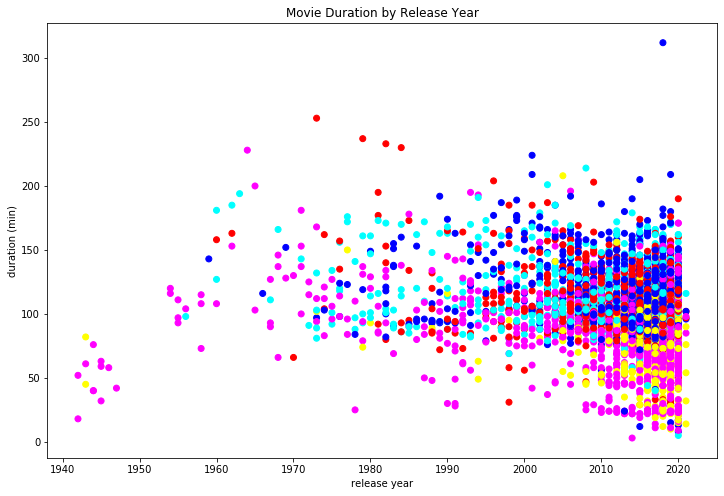

In [67]:
# Assign colors to genres
colors = []
for index, entry in df.iterrows():
    if entry['genre'] == 'Dramas':
        colors.append('blue')  # blue for dramas
    elif entry['genre'] == 'Comedies':
        colors.append('red')  # red for comedies
    elif entry['genre'] == 'Documentaries':
        colors.append('yellow')  # yellow for documentaries
    elif entry['genre'] == 'Action':
        colors.append('cyan')  # cyan for action movies
    else:
        colors.append('magenta')  # magenta for other genres

# Plot movie duration by year
fig = plt.figure(figsize=(12, 8))
plt.scatter(
    x=df.index,
    y=df['duration'],
    c=colors
)
plt.xlabel('release year')
plt.ylabel('duration (min)')
plt.title('Movie Duration by Release Year')
plt.show();

## Communicate result

From the above plots, it appears that the movie duration increased with year up to around 1965. Since 1965, there's been no clear relationship between movie duration and release year.